Assignment: Extra Credit CSE6040

Author: Mark Guza


This notebook serves as my extra credit assignemnt for CSE6040. 


According to an article written by the History Channel there is a theory that a majority of UFO sightings occur near nuclear powerplants. 


****Goal: ****
    
    Determine if this hypothesis is valid or not based upon independent datasets obtained from Kaggle. 


**** Documents/Files: ****

    1) CSV file of ufo sightings recorded around the world. 

        [ ExtraCreditData_ufo_sightings.csv ] - 6.69MB

    2) CSV file of nuclear sites around the United States. 

        [ US_Nuclear_Sites.csv ] - 3.96 KB

**** Links: ****

    1) https://www.nrc.gov/reactors/operating/list-power-reactor-units.html
    
    2) https://www.history.com/news/ufos-near-nuclear-facilities-uss-roosevelt-rendlesham



Goal of Project:
    To see if the History Channel's hypothesis is accurate and valid. In the below article they hypothesize that the majority of UFO sightings occur near nuclear energy sites. 

https://www.history.com/news/ufos-near-nuclear-facilities-uss-roosevelt-rendlesham
    
    
Strategy:
    To determine if the History Channel's assertion is correct or not I will analyze an independent data set of UFO sightings across the world and calculate the distance from each sighting to the nearest nuclear station. I will then see if I can draw conclusions from the findings and make a conclusion. 

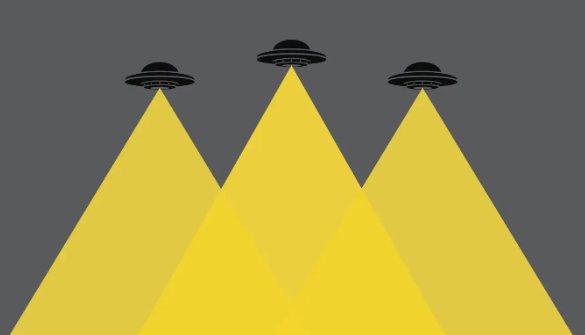

In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
#import ufo data (a list of ufo sightings)
ufo_data = pd.read_csv('ExtraCreditData_ufo_sightings.csv')
ufo_data.head(5)

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3319: DtypeWarning: Columns (5,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,1/22/2004,21.4180556,-157.803611


In [3]:
#Create a subset of the dataframe

ufo_data_ = ufo_data[['datetime','city','state','country','date posted','latitude','longitude ']]



ufo_data.head()
ufo_data.shape

(80332, 10)

Data Statistics:

Number of Observations: 80,332


Perform Initial Data Visualization to Gather Insights into Data...

In [4]:
#Group Data By Country to see where the majority of UFO sightings occur

plot_df = ufo_data.groupby(['country'], as_index=False).count().sort_values(by=['country'], ascending=False)
plot_df.head()

,country,datetime,city,state,shape,duration (seconds),duration (hours/min),date posted,latitude,longitude
4,us,65114,65114,65114,63561,65114,65114,65114,65114,65114
3,gb,1905,1905,12,1855,1905,1905,1905,1905,1905
2,de,105,105,0,103,105,105,105,105,105
1,ca,3000,3000,2985,2955,3000,3000,3000,3000,3000
0,au,538,538,10,527,538,538,538,538,538


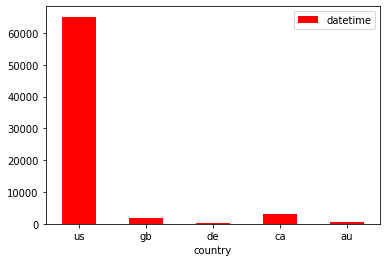

In [5]:
#Plot the country data for the top five highest countries with sightings
plot = plot_df.plot.bar(x='country', y='datetime', rot=0, color='red')

Wow - you can see the majority of the observations are from the United States. Let's see if we can zone in more by comparing the data with the location of nuclear sites. Let's only take the United States data for now. 

In [6]:
ufo_data_us = ufo_data_.copy()
ufo_data_us = ufo_data_us[ufo_data_us['country'] == 'us']

ufo_data_us['latitude'] = ufo_data_us['latitude'].astype(float).abs()
ufo_data_us['longitude '] = ufo_data_us['longitude '].astype(float).abs()
    

ufo_data_us.shape

(65114, 7)

Now let's import the United States Nuclear Site Location data...

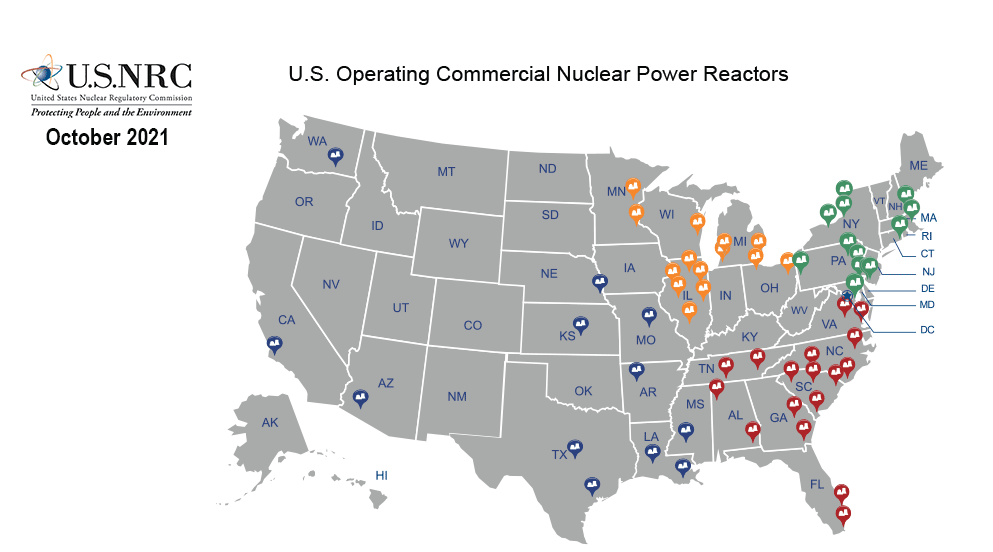

In [7]:
#import nuclear site data (a list of locations of US nuclear energy sites)
nuclear_data = pd.read_csv('US_Nuclear_Sites.csv')
nuclear_data.head(5)
#nuclear_data.shape

,Name,Location,Owner/Operator,Latitude,Longitude
0,Arkansas Nuclear 1,"London, AR","Entergy Nuclear Operations, Inc.",35.3315,93.2538
1,Beaver Valley 1,"Shippingport, PA",FirstEnergy Nuclear Operating Co.,40.6320,80.4140
2,Braidwood 1,"Braceville, IL","Exelon Generation Co., LLC",41.2270,88.2648
3,Browns Ferry 1,"Athens, AL",Tennessee Valley Authority,34.8029,86.9717
4,Brunswick 1,"Southport, NC","Duke Energy Progress, LLC",33.9182,78.0193


Use Haversine's Formula to determine the distance between each UFO sighting and each nuclear power site. 

https://en.wikipedia.org/wiki/Haversine_formula

In [8]:
import math

def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2): 
    R = 6371; #Radius of the earth in km
    dLat = math.radians(lat2-lat1);  #deg2rad below
    dLon = math.radians(lon2-lon1); 
    a = math.sin(dLat/2) * math.sin(dLat/2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(dLon/2) * math.sin(dLon/2)
     
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a)); 
    d = R * c; #Distance in km
  
    return d


In [9]:
#Due to there being 65,114 observations it is necessary to take a smaller sample of the data for computational cost reasons

#Take a random sample of 5,000 of the larger US UFO Sighting Dataset to make the analysis more efficient (might take one minute)

#Randomly select a specified number of rows...
df_us_ufo_samp1 = ufo_data_us.copy()

df_us_ufo_samp = df_us_ufo_samp1.sample(n=5000)

df_us_ufo_samp = df_us_ufo_samp.reset_index()

df_us_ufo_samp.head()

#Initialize variables and df columns
min_dist = 100000000
df_us_ufo_samp['dist_2_nuclear_site'] = df_us_ufo_samp['country'] 
df_us_ufo_samp['nuclear_site_name'] = df_us_ufo_samp['country']


#Iterate through each UFO observation and calculate the distance between each Nuclear site to find the closest site 
for i,row in df_us_ufo_samp.iterrows():
    
    ufo_lat = row['latitude']
    ufo_long = row['longitude ']
    min_dist = 100000000
    
    for n,row in nuclear_data.iterrows():
        nuc_lat = row['Latitude']
        nuc_long = row['Longitude']
        
        dist = getDistanceFromLatLonInKm(ufo_lat,ufo_long,nuc_lat,nuc_long)
        site = row['Name']
        
        
        if dist < min_dist:
            min_dist = dist
            closest_site = site
    
    #df_us_ufo_samp['dist_2_nuclear_site'][i] = min_dist  
    #df_us_ufo_samp['nuclear_site_name'][i] = closest_site
        
    
    df_us_ufo_samp.loc[i,'dist_2_nuclear_site'] = min_dist  
    df_us_ufo_samp.loc[i,'nuclear_site_name'] = closest_site
    


In [10]:
df_us_ufo_samp.head()

,index,datetime,city,state,country,date posted,latitude,longitude,dist_2_nuclear_site,nuclear_site_name
0,49995,6/18/2011 17:20,spring valley,ca,us,6/20/2011,32.744722,116.998056,392.692456,Palo Verde 1
1,71385,8/4/2006 23:00,ferris,tx,us,10/30/2006,32.533889,96.665278,107.642588,Comanche Peak 1
2,13480,11/28/2007 21:00,williamston,sc,us,1/21/2008,34.618333,82.478056,44.102807,Oconee 1
3,27464,2/20/1998 11:30,fairfield,ca,us,1/28/1999,38.249444,122.038889,360.629505,Diablo Canyon 1
4,15187,1/16/1996 22:32,monitor,wa,us,11/2/1999,47.486944,120.416944,159.772959,Columbia Generating Station


Now i want to assign a classification to each distance to make the analysis easier:




    Very Close => UFO sighting within 100km of the closest nuclear site

    Near => UFO sighting between 100km and 400km of the closest nuclear site 

    Somewhat Far => UFO sighting between 400km and 600km of the closest nuclear site

    Far => UFO sighting between 600km and 800km of the closest nuclear site

    Very Far => UFO sighting farther than 800km from the closest nuclear site




Note: While these classification category limits are subjecive I believe they are to be reasonable as the entire United States is roughly 4,509km. For example, if a UFO sighting is within 100km (62 miles) that is pretty close when looking at the entire United States distance across. 

In [11]:
df_us_ufo_samp['distance_classification'] = df_us_ufo_samp['dist_2_nuclear_site']

for i,row in df_us_ufo_samp.iterrows():
    
    if row['dist_2_nuclear_site'] < 100:
        df_us_ufo_samp.loc[i,'distance_classification'] = "Very Close" 
        
    elif (row['dist_2_nuclear_site'] > 100) and (row['dist_2_nuclear_site'] < 300):
        df_us_ufo_samp.loc[i,'distance_classification'] = "Near" 
        
    elif (row['dist_2_nuclear_site'] > 300) and (row['dist_2_nuclear_site'] < 500):   
        df_us_ufo_samp.loc[i,'distance_classification'] = "Somewhat Far" 
        
    elif (row['dist_2_nuclear_site'] > 500) and (row['dist_2_nuclear_site'] < 700):
        df_us_ufo_samp.loc[i,'distance_classification'] = "Far"  
        
    elif row['dist_2_nuclear_site'] > 700:
        df_us_ufo_samp.loc[i,'distance_classification'] = "Very Far"
        
    else:
        df_us_ufo_samp.loc[i,'distance_classification'] = "NA"
        
    
df_us_ufo_samp.head()

,index,datetime,city,state,country,date posted,latitude,longitude,dist_2_nuclear_site,nuclear_site_name,distance_classification
0,49995,6/18/2011 17:20,spring valley,ca,us,6/20/2011,32.744722,116.998056,392.692456,Palo Verde 1,Somewhat Far
1,71385,8/4/2006 23:00,ferris,tx,us,10/30/2006,32.533889,96.665278,107.642588,Comanche Peak 1,Near
2,13480,11/28/2007 21:00,williamston,sc,us,1/21/2008,34.618333,82.478056,44.102807,Oconee 1,Very Close
3,27464,2/20/1998 11:30,fairfield,ca,us,1/28/1999,38.249444,122.038889,360.629505,Diablo Canyon 1,Somewhat Far
4,15187,1/16/1996 22:32,monitor,wa,us,11/2/1999,47.486944,120.416944,159.772959,Columbia Generating Station,Near


In [12]:
plot_data = df_us_ufo_samp.groupby(by=['distance_classification'], as_index=False).count()
plot_data.head()

,distance_classification,index,datetime,city,state,country,date posted,latitude,longitude,dist_2_nuclear_site,nuclear_site_name
0,Far,158,158,158,158,158,158,158,158,158,158
1,Near,2497,2497,2497,2497,2497,2497,2497,2497,2497,2497
2,Somewhat Far,621,621,621,621,621,621,621,621,621,621
3,Very Close,1484,1484,1484,1484,1484,1484,1484,1484,1484,1484
4,Very Far,240,240,240,240,240,240,240,240,240,240


In [13]:
sorted_plot_data = plot_data[['distance_classification','datetime']]
sorted_plot_data = dict(sorted_plot_data.rename(columns={'datetime':'distance[km]'}))
#sorted_plot_data = sorted_plot_data.reindex(['Very Close', 'Near', 'Somewhat Far','Far','Very Far'])
#sorted_plot_data['distance [km]'] = plot_data['country']

sorted_dict = {
    
    'Very Close' : sorted_plot_data['distance[km]'][3],
    'Near': sorted_plot_data['distance[km]'][1],
    'Somewhat Far' : sorted_plot_data['distance[km]'][2],
    'Far': sorted_plot_data['distance[km]'][0],
    'Very Far': sorted_plot_data['distance[km]'][4]
    
}


print(sorted_dict)

{'Very Close': 1484, 'Near': 2497, 'Somewhat Far': 621, 'Far': 158, 'Very Far': 240}


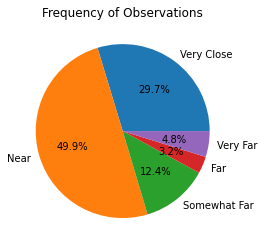

In [14]:
#pie_plot = sorted_dict.plot(kind='pie', y='index', autopct='%1.0f%%', shadow=True)

import matplotlib.pyplot as plt

data = sorted_dict

# Get the Keys and store them in a list
labels = list(data.keys())

# Get the Values and store them in a list
values = list(data.values())


# Plot
fig, ax = plt.subplots()
ax.pie(values, labels=labels,autopct='%1.1f%%')
#ax.set_ylabel('Frequency')
#ax.set_xlabel('Distance Classification')
ax.set_title('Frequency of Observations')
plt.show()

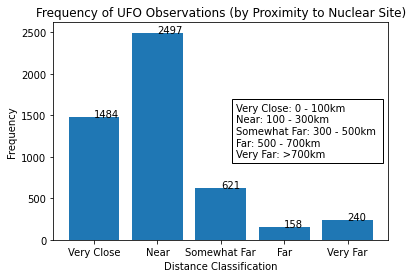

In [15]:
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText

data = sorted_dict
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots()

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

#Bar Plot
ax.bar(range(len(data)), values, tick_label=names)
ax.set_ylabel('Frequency')
ax.set_xlabel('Distance Classification')
ax.set_title('Frequency of UFO Observations (by Proximity to Nuclear Site)')
addlabels(names, values)
anchored_text = AnchoredText("Very Close: 0 - 100km \nNear: 100 - 300km \nSomewhat Far: 300 - 500km \nFar: 500 - 700km \nVery Far: >700km", loc=5)
ax.add_artist(anchored_text)


*********************************************CONCLUSIONS*****************************************************************


After reviewing the data and running the simulation multiple times with different sample sets and sizes, I believe that the History Channel's assertion that most UFO sightings occur near nuclear technology sites is NOT ENTIRELY ACCURATE. 

Most UFO observations DO appear to fall into the "Near" category but the "Very Close" category is still not the highest by a long shot. The fact that we defined "Near" as being 100 - 300 km (60 - 180 mi) away from a nuclear site is also reason to believe that the correlation is low. While there is a RIGHT SKEWED frequency distribution (positive skewness) I believe that there is not enough evidence to state a true correlation and rule out a coincidence. 

For me to accurately and confidently say that the History Channel's claim is correct I would need to see a significant majority of the data points in the "VERY CLOSE" category. Therefore I disagree with History Channel's assertion. 

Below I have ran three simulations using 5000 sample data points and made frequency and pie plots of each. It is easy to see that they are pretty similar and all have the same skewness. I stand by my conclusions and do not support the History Channel's hypthesis/claim. 

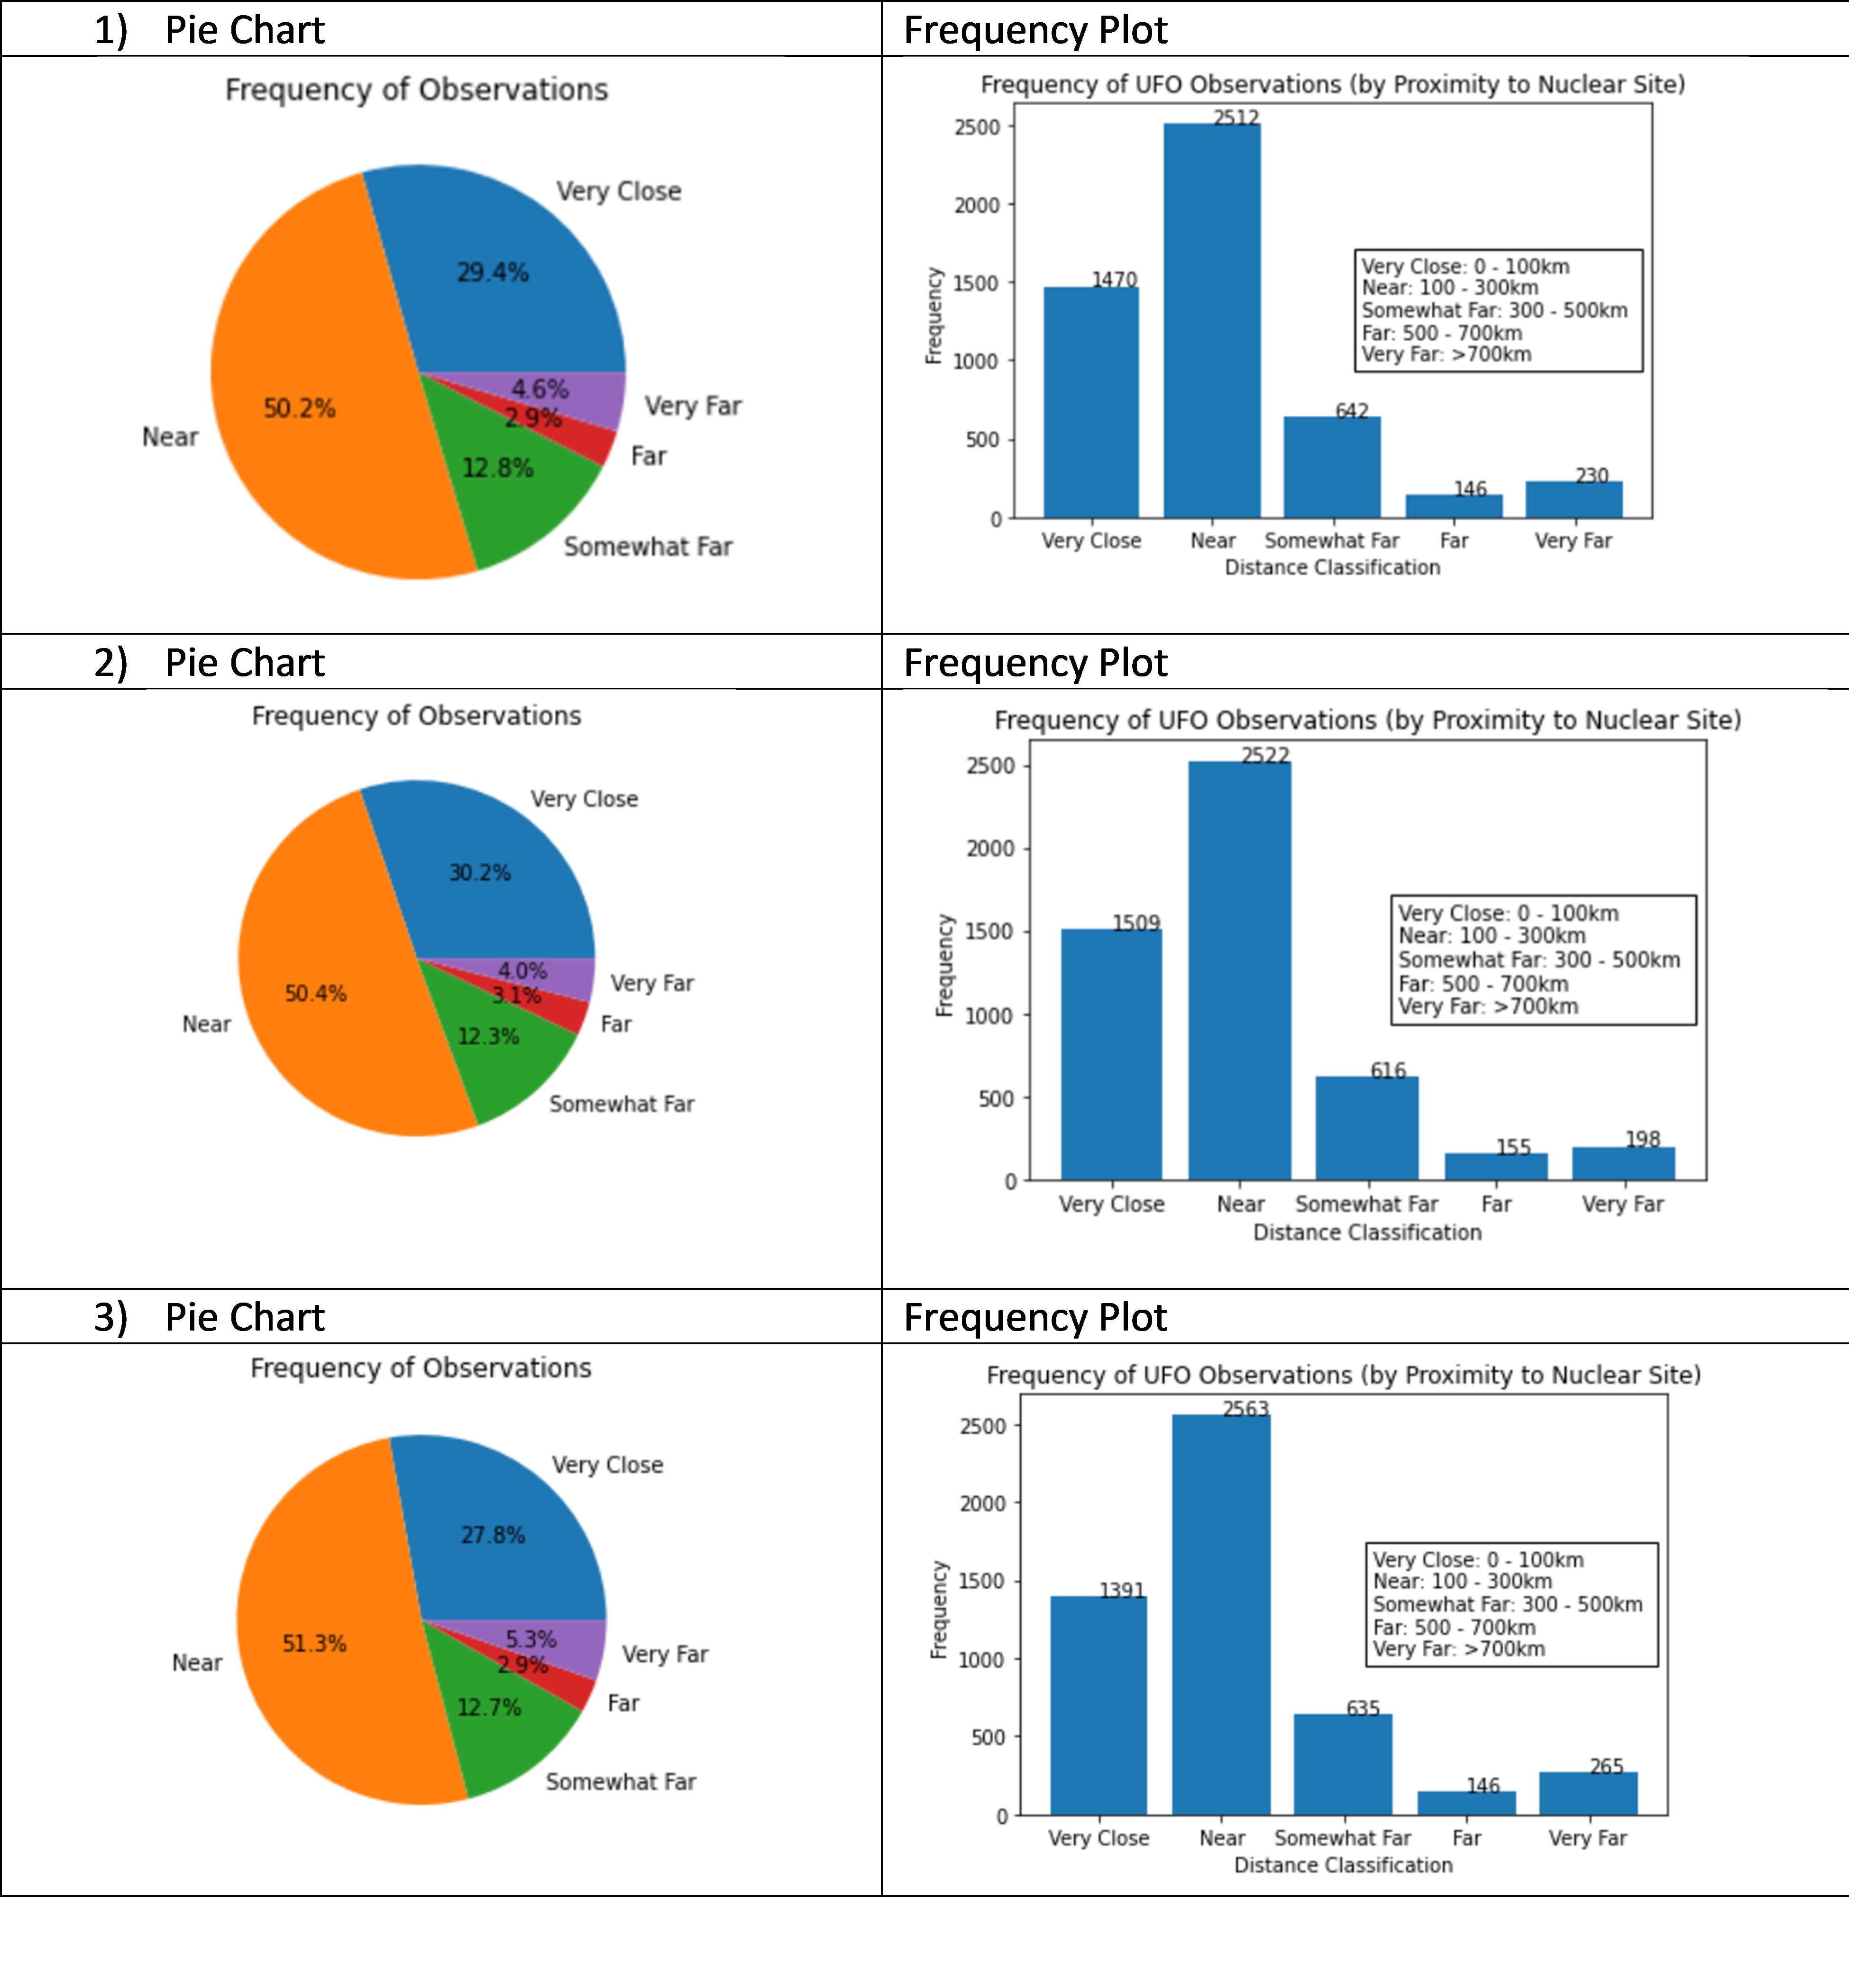

************************************************** LESSONS LEARNED *********************************************************


In this notebook I have demonstrated several concepts that were taught and learned in the CSE6040 class. Some examples are as follows:

    1) Importing Data using Pandas

    2) Cleaning Data to extract useful information

    3) Taking subsets and manipulating Pandas dataframes

    4) Using MatPlotLib to visualize data 

    5) Iterating through a dataset using "iterrows()"
    
    6) Using dictionaries, lists, and dataframes
    
    7) Using Pandas, Numpy, and Matplotlib 
    
    8) Producing clean results 
    
    9) Drawing conclusions and reasonable judgements based upon the data and results